# Predict survival on the Titanic

In [1]:
#import libraries for data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read train data using pandas
train = pd.read_csv('train.csv',index_col = 'PassengerId')

# Read test data using pandas
test = pd.read_csv('test.csv',index_col = 'PassengerId')

In [3]:
# check the first 5 rows

train.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#cheaking for null
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Data Visualization

### Use heatmap to check for missing values.

In [5]:
def missing_values(data, cmap = 'viridis'):
    """
    Given the data, this function will return a graph for missing values
    
    Parameters
    ----------
    data : Pandas dataframe.
    cmap : matplotlib colormap name or object, or list of colors, optional
    The mapping from data values to color space. If not provided, the
    default is 'viridis'.
    
    """
    return sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

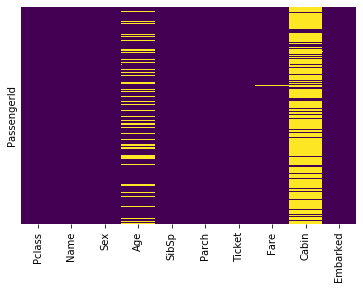

In [6]:
missing_values(test)

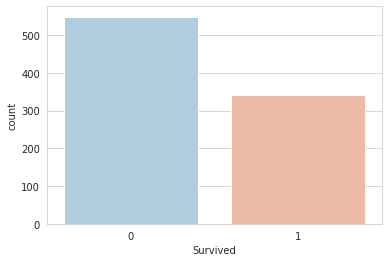

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

### Check the ratio for male and female who survived

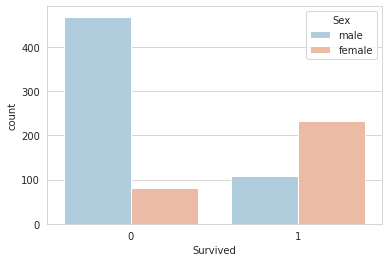

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

### In terms of class

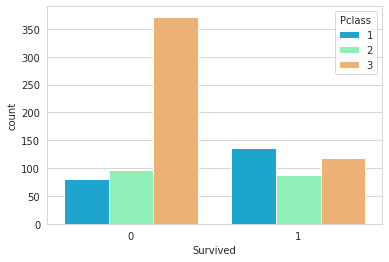

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

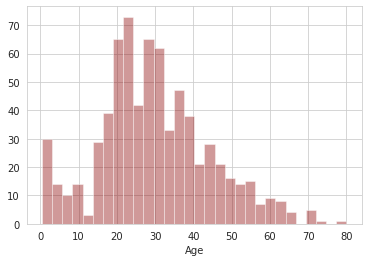

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

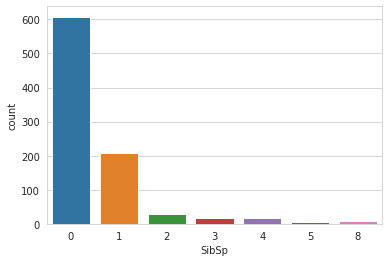

In [11]:
sns.countplot(x='SibSp',data=train)

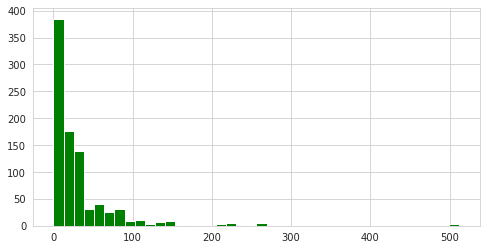

In [12]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))


### How many unique tickets are there?

In [13]:
train['Ticket'].nunique()

681

### Create a new feature with the titles

In [14]:
train['title'] = train['Name'].apply(lambda myString: myString[myString.find(",")+2:myString.find(".")])
test['title'] = test['Name'].apply(lambda myString: myString[myString.find(",")+2:myString.find(".")])

In [15]:
train['title'].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Jonkheer          1
Sir               1
the Countess      1
Don               1
Capt              1
Lady              1
Ms                1
Mme               1
Name: title, dtype: int64

## Data Cleaning

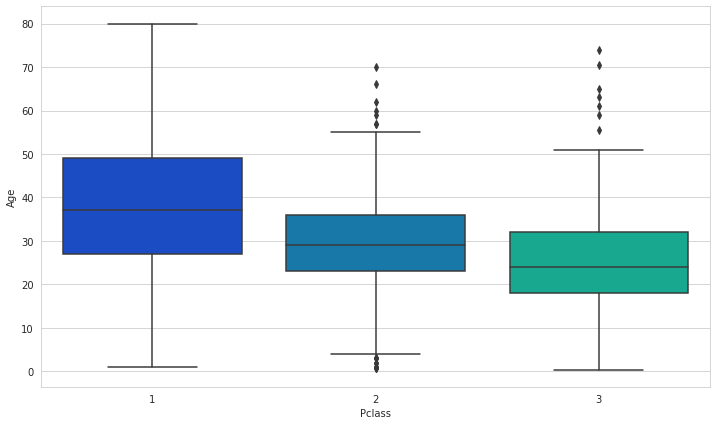

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

### Let's check the heatmap again

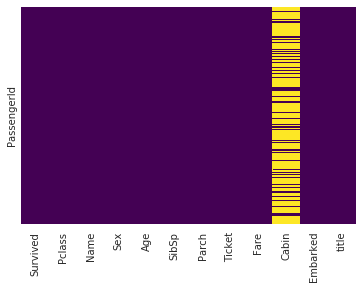

In [19]:
missing_values(train)

### Let's  convert categorical features to dummy variables using pandas! 

**There are so many missing values in "cabin" column, that it's better to drop it**

In [44]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)


KeyError: "['Cabin'] not found in axis"

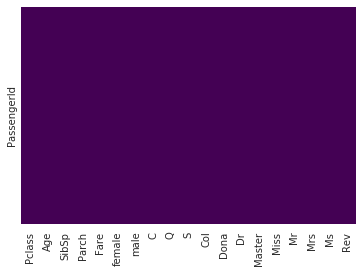

In [43]:
test[test['Fare'].isna() == True] = test['Fare'].mean()
#checking for the missing values again
missing_values(train)
missing_values(test)

In [22]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
title = pd.get_dummies(train['title'],drop_first=True)



In [24]:
sext = pd.get_dummies(test['Sex'],drop_first=True)
embarkt = pd.get_dummies(test['Embarked'],drop_first=True)
titlet = pd.get_dummies(test['title'],drop_first=True)

In [25]:
#drop the categorical features
train.drop(['Sex','Embarked','Name','Ticket','title'],axis=1,inplace=True)
# replace them with the nummeric values 
train = pd.concat([train,sex,embark,title],axis=1)

In [26]:
#drop the categorical features
test.drop(['Sex','Embarked','Name','Ticket','title'],axis=1,inplace=True)
# replace them with the nummeric features 
test = pd.concat([test,sext,embarkt,titlet],axis=1)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 19 columns):
Pclass    418 non-null float64
Age       418 non-null float64
SibSp     418 non-null float64
Parch     418 non-null float64
Fare      418 non-null float64
female    418 non-null uint8
male      418 non-null uint8
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
Col       418 non-null uint8
Dona      418 non-null uint8
Dr        418 non-null uint8
Master    418 non-null uint8
Miss      418 non-null uint8
Mr        418 non-null uint8
Mrs       418 non-null uint8
Ms        418 non-null uint8
Rev       418 non-null uint8
dtypes: float64(5), uint8(14)
memory usage: 25.3 KB


## Building models
**We will be testing Logistic regression and Random forest for now. More models can be used depending on the accuracy**

In [29]:
#import libraries

from sklearn.model_selection import train_test_split #for train test split
#We can check precision,recall,f1-score using classification report!
from sklearn.metrics import classification_report,accuracy_score

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Train Test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)


In [33]:
logmodel = LogisticRegression(solver = 'lbfgs',max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predict_log = logmodel.predict(X_test)

In [35]:
print(classification_report(y_test,predict_log))
print (accuracy_score(y_test,predict_log))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       154
           1       0.83      0.73      0.78       114

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

0.8208955223880597


In [36]:
y_train = np.asarray(y_train).ravel()
regmodel = RandomForestClassifier(n_estimators=100, min_samples_split=2)
regmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
predict_reg = regmodel.predict(X_test)

In [38]:
print(classification_report(y_test,predict_reg))
print (accuracy_score(y_test,predict_reg))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       154
           1       0.79      0.74      0.76       114

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.80       268

0.8059701492537313


In [42]:
test.shape, X_test.shape

((418, 19), (268, 24))

In [49]:
X_train.keys()

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 'Col',
       'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle',
       'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess'],
      dtype='object')

In [48]:
test.keys()

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q',
       'S', 'Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'],
      dtype='object')